In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec

In [2]:
path = "D:/NLP/Day4 Word2Vec/newsArticle.txt"
with open (path,"r",encoding= 'utf-8') as f:
    data = f.read()
sentences = sent_tokenize(data)

tokenized_sentence = []
for sentence in sentences:
    words = word_tokenize(sentence.lower())
    words = [word for word in words if word not in string.punctuation]
    tokenized_sentence.append(words)

model = Word2Vec(sentences = tokenized_sentence,
                vector_size = 100,
                window = 5, 
                min_count = 2, 
                sg = 1, 
                workers = 4)

In [3]:
print(model.wv['india'])

# Find top 5 similar words
print(model.wv.most_similar('cricket', topn=5))



[-7.1346918e-03 -1.8119195e-03 -7.8690192e-03  7.0043169e-03
  6.8053612e-03  4.2014178e-03  8.8388221e-03  1.0780321e-03
 -9.6084075e-03  8.1505040e-03 -5.2687069e-03  6.5426645e-03
  4.9147340e-03 -1.0849771e-03 -7.1671014e-03 -1.6898308e-03
  5.8765626e-03 -6.9667273e-03  1.9904547e-03 -9.7351763e-03
  8.9959996e-03 -2.7416230e-03  1.0042248e-02 -6.1133592e-03
 -1.0381749e-02 -8.6224768e-03 -4.3596588e-03  4.1285413e-03
 -5.0959119e-04  9.6106427e-03  3.3590405e-03  3.2747129e-03
  4.2068097e-03  6.9678398e-03 -2.5039245e-03  8.2802661e-03
 -9.3084779e-03  3.1690910e-03 -3.4083956e-04 -1.0343386e-04
  8.0628432e-03 -3.5127588e-03 -2.7696330e-03 -1.3298092e-04
  1.6863710e-04 -3.6393728e-03  5.6799212e-03 -6.8389359e-03
  8.9006480e-03 -2.9982778e-04  2.6942219e-03  2.8083469e-03
  3.4655666e-04  2.2710599e-03 -2.9519277e-03  4.7237314e-03
  9.9655706e-04 -3.5345869e-03 -8.8835079e-03 -9.6843522e-03
  2.0265313e-04 -6.0208435e-03 -1.0768546e-03 -4.2163981e-03
 -9.1365175e-03  1.96984

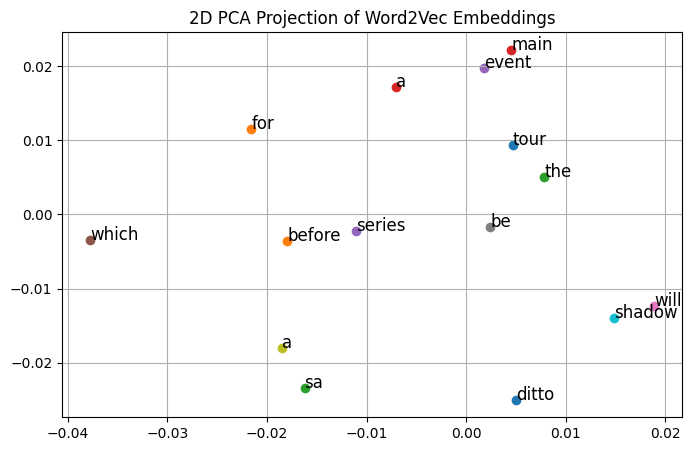

In [4]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

top_n = 30
most_frequent_word = model.wv.index_to_key[:top_n]

word_vector = [model.wv[word] for word in most_frequent_word]

pca = PCA(n_components= 2)
reduced_vectors = pca.fit_transform(word_vector) 


plt.figure(figsize=(8, 5))
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=12)
    
plt.title("2D PCA Projection of Word2Vec Embeddings")
plt.grid(True)
plt.show()


In [5]:
model.wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4